### Members:
* Akniyet Maratova
* Symbat Kozhakan
* Altynshash Daniyarova

### Group: BDA-1904

# Topic: Stroke Prediction

### Content

<font color='black'>
    
*  [Introduction: ](#intro)
* [Data description](#data)
* [Exploratory Data Analysis (EDA)](#eda)
* [Hangling missing values](#mis)
* [Data Preprocessing](#pre)
* [Feature selection](#sel)
* [Modeling](#mod)
* [Conclusion](#con)
* [Reference](#ref)

According to the World Health Organization (WHO)  report, it is known that among leading causes of deaths in the world stroke takes the 2nd place constituting to 11% of global death number.

Based on input parameters such as gender, age, multiple disorders, and smoking status, this dataset https://www.kaggle.com/fedesoriano/stroke-prediction-dataset is used to determine when a patient is likely to have a stroke. Each row of data in the table contains pertinent details about the patient.


<a id="intro"></a>
## 1. Introduction

### Research Questions


1. Does smoking status has impact on strokes?
2. Does heart disease in a person, propel a heart stroke?
3. Does age has impact on stokes?
4. Does the type of job, whether stressful or not, contribute to heart stroke?
5. Does the marriage status affect to having stroke?




<a id="data"></a>
## 2. Data description

1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not


<a id="pre"></a>
## 3. Data importing

In [ ]:
#necessary libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px

In [ ]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv", sep="," , encoding='latin-1')

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### 3.3. Data manipulation: cleaning and shaping


In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
print(round(df['avg_glucose_level'], 0))

0       229.0
1       202.0
2       106.0
3       171.0
4       174.0
        ...  
5105     84.0
5106    125.0
5107     83.0
5108    166.0
5109     85.0
Name: avg_glucose_level, Length: 5110, dtype: float64


In [ ]:
df['avg_glucose_level'] = round(df['avg_glucose_level'], 0)

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,229.0,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.0,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,106.0,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.0,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.0,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,84.0,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.0,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,83.0,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.0,25.6,formerly smoked,0


In [ ]:
#Calculates the number of rows and columns
print(df.shape)

(5110, 12)


In [ ]:
# The datatypes of the different attributes of the dataset
print(df.dtypes)

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


<a id="eda"></a>

## 4.  Exploratory Data Analysis (EDA)

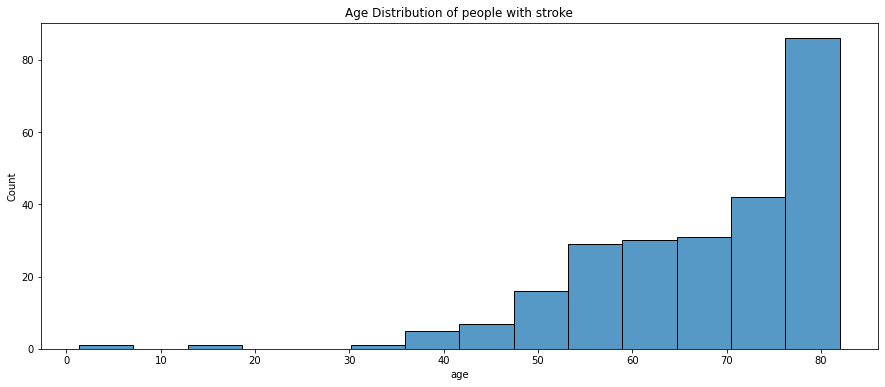

In [ ]:
fig, ax = plt.subplots( figsize=(15, 6))
sns.histplot(x='age',data=df[df['stroke'] == 1])
plt.title('Age Distribution of people with stroke')
plt.show()

Age category that struggles with stroke most frequently is between 70 and 80. The next one is between 50 and 70.

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


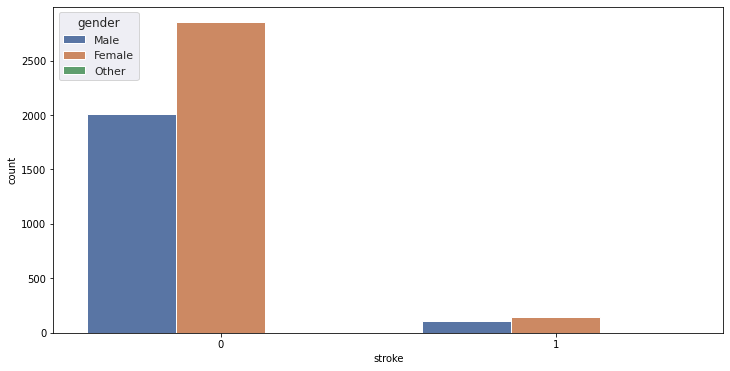

In [ ]:
print(df.gender.value_counts())

fig, ax = plt.subplots( figsize=(12, 6))

sns.set_theme(style="darkgrid")
sns.countplot(x="stroke",data=df,hue='gender')
plt.show()

We could notice that the dataset is imbalanced. The number of women in both cases higher.

In [ ]:
print(df['smoking_status'].value_counts()) 

stk = df.copy(deep=False)
stk["stroke"] = stk["stroke"].astype(str)
fig = px.histogram(stk, x="smoking_status",color="stroke", color_discrete_map = {0:'#32e3b4',1:'#a151f0'})

fig.show()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


There are 4 types of smoking status and this graph allows us to see the number of those who have had stoke in each type. 

Let's look deeper at people who have experiences stroke and their smoking status.

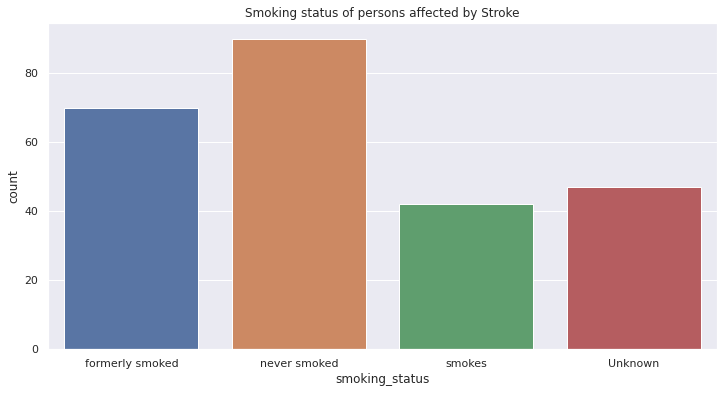

In [ ]:
fig, ax = plt.subplots( figsize=(12, 6))

ax=sns.countplot(x='smoking_status',data=df[df['stroke']==1])
plt.title("Smoking status of persons affected by Stroke")
plt.show()

The number of people who have ever smoked(formerly smoked+smokes) is more than those who have never smokes, so smoking might affect to stroke. 

In [ ]:
marry_status = df.groupby(["ever_married", "stroke"]).agg({"stroke": "count"}).rename(columns = {"stroke": "count"}).reset_index()
marry_status.iloc[[0,1], 0] = 'Single'
marry_status.iloc[[2,3], 0] = 'Married'
marry_status.iloc[[0, 2], 1] = "no stroke"
marry_status.iloc[[1, 3], 1] = "has stroke"
marry_status



fig = px.bar(marry_status, x = "ever_married", y = "count", color = "stroke", title = "Marriage status on stroke risk",
             color_discrete_map = {"no stroke": '#32e3b4', 'has stroke': '#a151f0'})



fig.update_yaxes(showline = True, linecolor = '#f5f2f2', linewidth = 2,
                 showgrid = True, gridwidth = 1, gridcolor = '#f5f2f2',
                 title_font_size = 17, title_font_color = '#221f1f', tickfont_color = '#221f1f')

fig.update_xaxes(showline = True, linecolor = '#f5f2f2', linewidth = 2, title = 'Status',
                 title_font_size = 17, title_font_color = '#221f1f', tickfont_color = '#221f1f')

fig.show()

According to this barplot we can see the the problem of stroke among single and married people. 

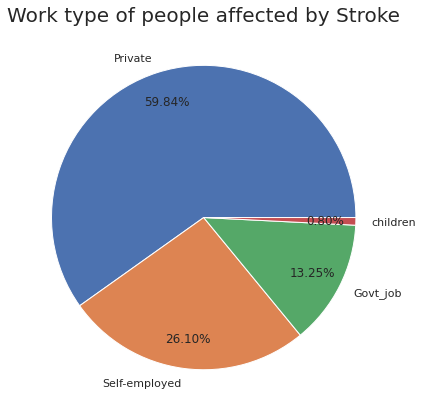

In [ ]:
work_type = df[df['stroke'] == 1]['work_type']
values = work_type.value_counts()
labels = values.keys()
bar,ax = plt.subplots(figsize=(7,7))
plt.pie(x = values, labels = labels , autopct="%.2f%%",pctdistance=0.8)
plt.title('Work type of people affected by Stroke', fontsize=20)
plt.show()

Approximately 60% of the people who are affected by stroke belongs to private work type. So, we could say that the people working in private jobs might experience high stress or pressure.

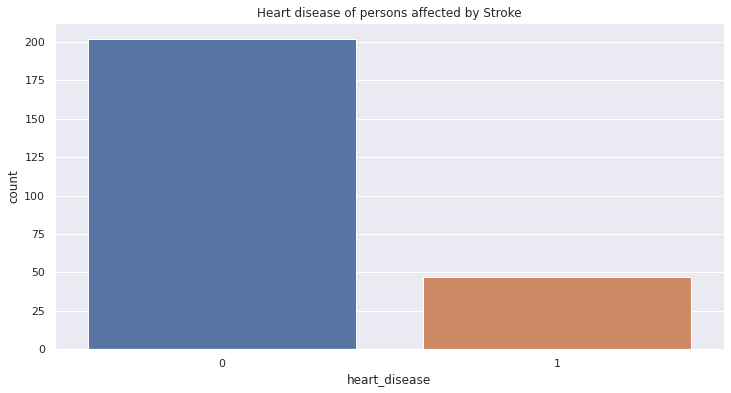

In [ ]:
fig, ax = plt.subplots( figsize=(12, 6))

ax=sns.countplot(x='heart_disease',data=df[df['stroke']==1])
plt.title("Heart disease of persons affected by Stroke")
plt.show()

Most of people who experienced stroke did not have heart disease.

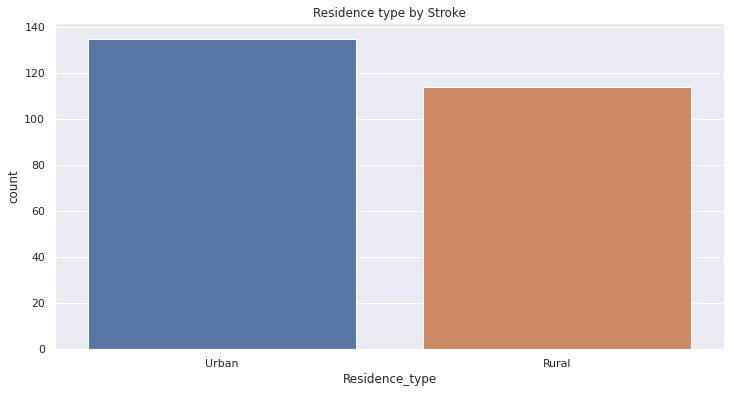

In [ ]:
fig, ax = plt.subplots( figsize=(12, 6))

ax=sns.countplot(x='Residence_type',data=df[df['stroke']==1])
plt.title("Residence type by Stroke")
plt.show()

Most of people who experienced stroke live in urban area

<a id="mis"></a>
## 5 Handling Missing Values


In [ ]:
df.replace('Unknown',np.nan,inplace=True)

In [ ]:
df.isnull().sum()  

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   201
smoking_status       1544
stroke                  0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     3566 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
!pip install missingno

##### Visualizing Missing Values with Missingno

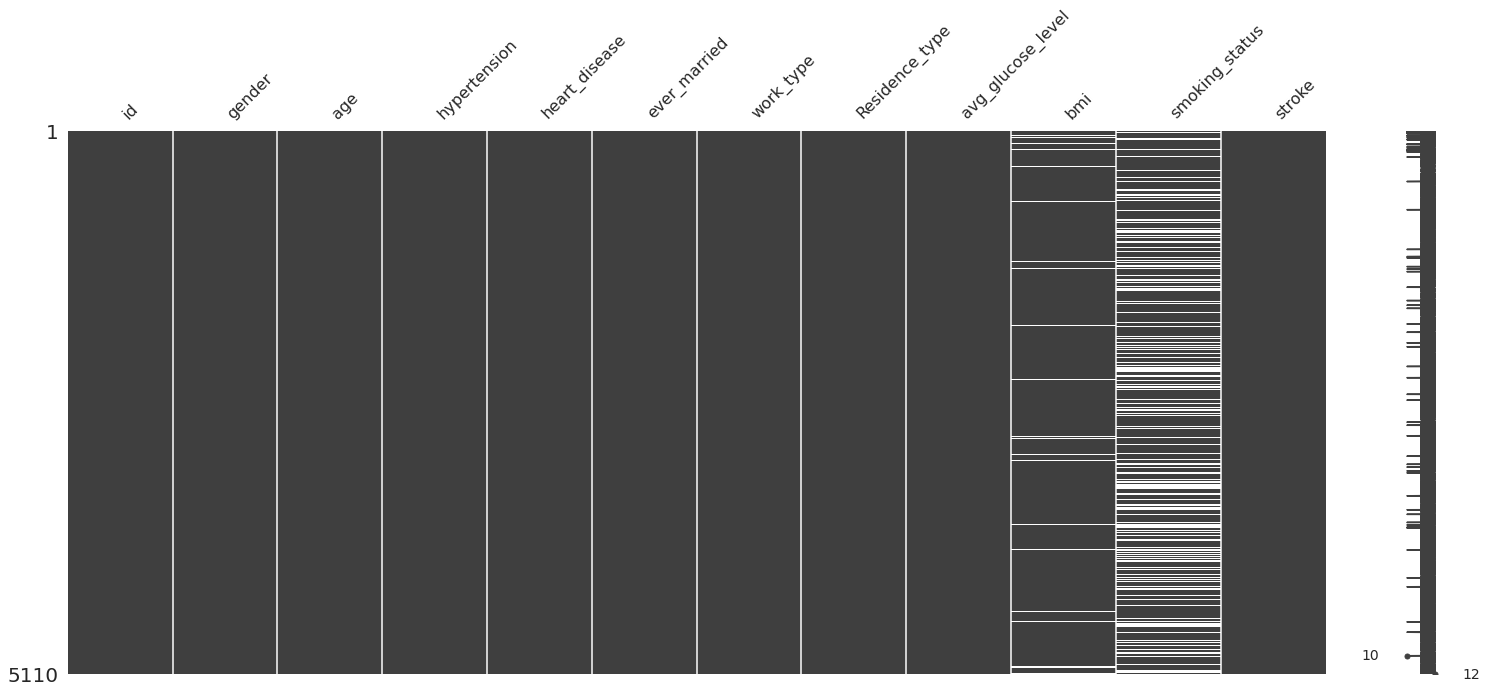

In [ ]:
import missingno as msno
msno.matrix(df)

The reason of missingness is unknown. No relashionship between them.

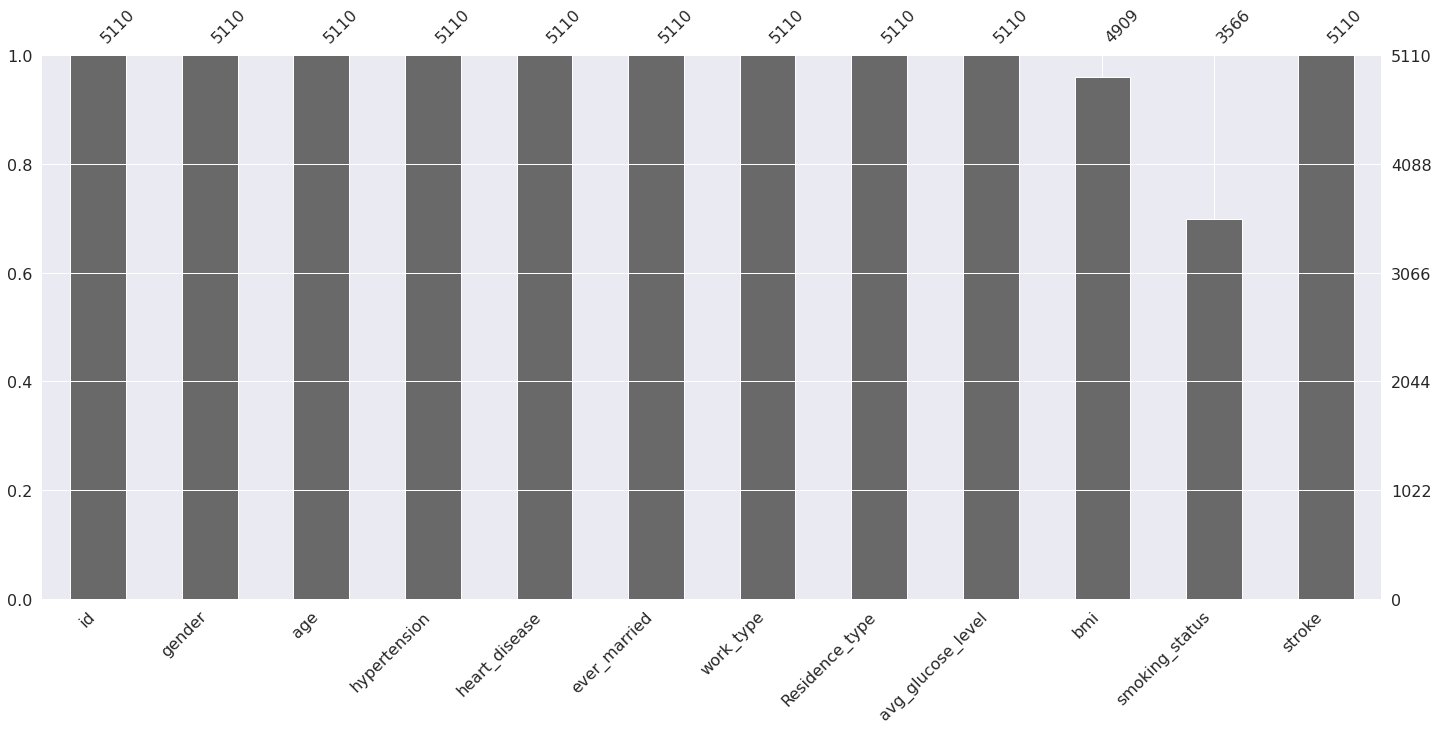

In [ ]:
msno.bar(df)

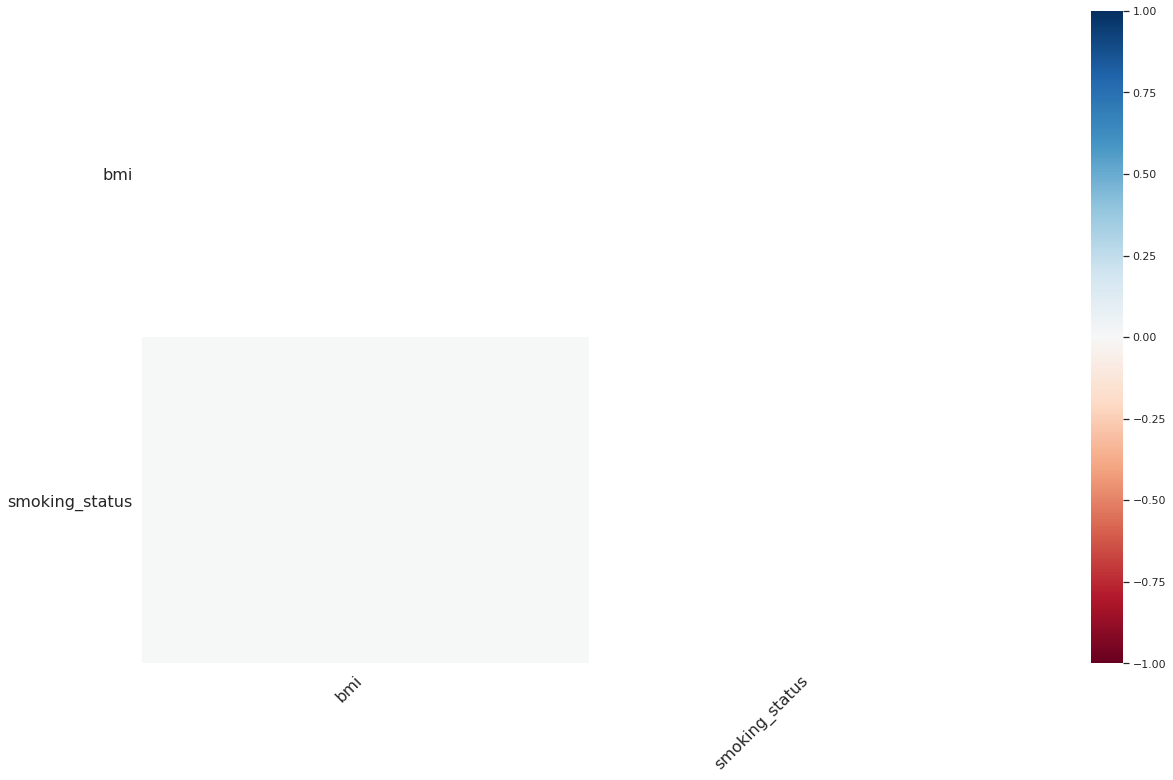

In [ ]:
msno.heatmap(df)

There is no relationship between missigness of smoking_status and bmi.

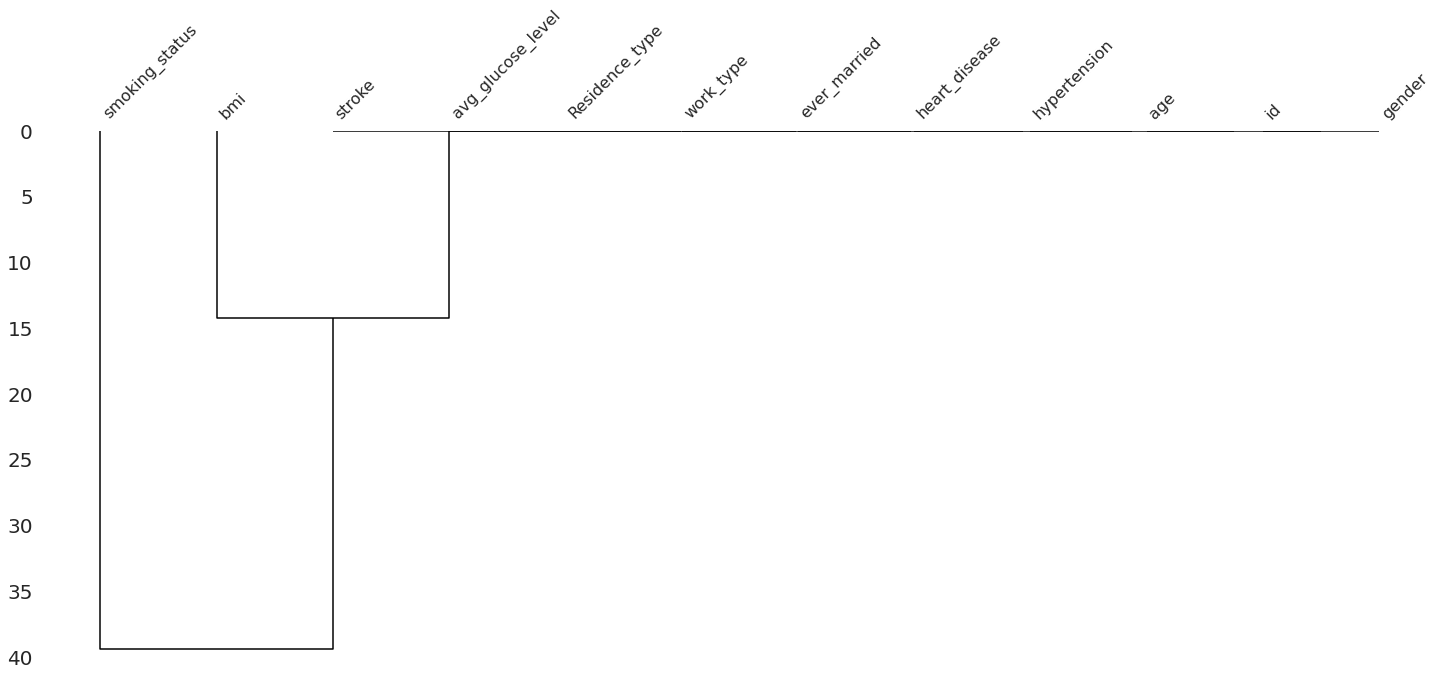

In [ ]:
msno.dendrogram(df)

### Dropping Columns

 Column 'id' is unneccassary for further analysis

In [ ]:
df = df.drop(['id'], axis = 1) 

##### Missing Values Imputations

Method for categorical data: Filling with most frequent category

Reason: Simple and easy to implement for categorical variables/columns.

In [ ]:
df['smoking_status'].fillna(df['smoking_status'].mode()[0], inplace=True)


Method for numeric data: Filling with median values

Reason: There are outliers, so in order to not create more outliers it is better to use median method.



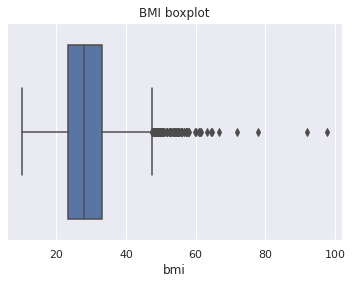

In [ ]:
sns.boxplot(x='bmi', data = df)
plt.title('BMI boxplot')
plt.show()

In [ ]:
df['bmi'].fillna(value=df['bmi'].median(), inplace=True)

#### Dealing with Categorical Data

Removing the 'other' from gender to avoid confusions


In [ ]:
df["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [ ]:
df.drop(df[df['gender'] == 'Other'].index, inplace = True)
df["gender"].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

#### Converting categorical data into numeric

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])


In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,229.0,36.6,0,1
1,0,61.0,0,0,1,3,0,202.0,28.1,1,1
2,1,80.0,0,1,1,2,0,106.0,32.5,1,1
3,0,49.0,0,0,1,2,1,171.0,34.4,2,1
4,0,79.0,1,0,1,3,0,174.0,24.0,1,1


### Rescaling (Normalization)
Numeric values of dataset are in different scales, numeric values are larger than convered categorical values. Normalization is used to solve this problem with help of MinMaxScaler.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['age', 'hypertension', 'avg_glucose_level', 'bmi']

df[num_vars] = scaler.fit_transform(df[num_vars])

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,0.816895,0.0,1,1,2,1,0.801843,0.301260,0,1
1,0,0.743652,0.0,0,1,3,0,0.677419,0.203895,1,1
2,1,0.975586,0.0,1,1,2,0,0.235023,0.254296,1,1
3,0,0.597168,0.0,0,1,2,1,0.534562,0.276060,2,1
4,0,0.963379,1.0,0,1,3,0,0.548387,0.156930,1,1


### Balancing with SMOTE



SMOTE (Synthetic Minority Oversampling Technique) is used for oversampling imbalanced classification dataset

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



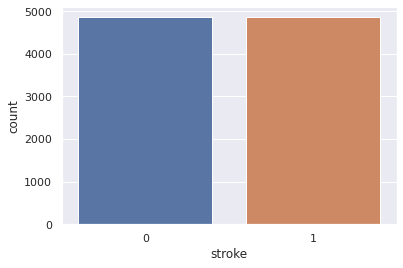

In [ ]:
# Using SMOTE
from imblearn.over_sampling import SMOTE
sampler = SMOTE(random_state = 42)
X = df.drop(['stroke'],axis=1)
y = df[['stroke']]
X,y= sampler.fit_resample(X,y['stroke'].values.ravel())
y = pd.DataFrame({'stroke':y})
sns.countplot(data = y, x = 'stroke', y= None)
plt.show()

<a id="sel"></a>
## 6. Feature selection

This is a supervised learning, as dataset has target value 'stroke'  with categorical value.
Filter Method is chosen to select subsets of features based on their relationship with the target.
 * Statistical Methods: Univariate

#### Univariate Method
Statistical tests can be used to select those features that have the strongest relationship with the output variable.

SelectKBest class is used to select a specific number of features.

The chi-squared (chi²) statistical test for non-negative features to select k (k=10) of the best features.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df.iloc[:,0:10]  #independent variables
y = df.iloc[:,-1]    #target variable i.e stroke

In [ ]:
#apply SelectKBest class to extract top 10 best features

BestFeatures = SelectKBest(score_func=chi2, k=10)
fit = BestFeatures.fit(X,y)

In [ ]:
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

In [ ]:
#concatenating two dataframes for better visualization

f_Scores = pd.concat([df_columns,df_scores],axis=1)               # feature scores
f_Scores.columns = ['Column','Score']  

In [ ]:
f_Scores 


,Column,Score
0,gender,0.246877
1,age,44.442344
2,hypertension,75.418319
3,heart_disease,87.957296
4,ever_married,20.595671
5,work_type,2.927120
6,Residence_type,0.597112
7,avg_glucose_level,16.450267
8,bmi,0.243199
9,smoking_status,2.349454


In [ ]:
print(f_Scores.nlargest(10,'Score'))       # print 10 best features in descending order


              Column      Score
3      heart_disease  87.957296
2       hypertension  75.418319
1                age  44.442344
4       ever_married  20.595671
7  avg_glucose_level  16.450267
5          work_type   2.927120
9     smoking_status   2.349454
6     Residence_type   0.597112
0             gender   0.246877
8                bmi   0.243199


The best features are The best features are heart_disease, hypertension, age, ever_married, avg_glucose_level, work_type, and smoking_status

<a id="mod"></a>
## 7. Modeling

#### Splitting into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 51)

#### Logistic Regression

Logistic Regression works with binary data, where either the event happens (1) or the event does not happen (0).

In [ ]:
from sklearn.metrics import accuracy_score

# for logit regression. 
# statsmodel is chosen because it outputs descriptive stats for the model
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
predictors = ['heart_disease', 'hypertension', 'age', 'ever_married', 'avg_glucose_level', 'work_type', 'smoking_status']

stroke = df[df['stroke'] == 1]
no_stroke = df[df['stroke'] == 0]


#80% to train set
train = pd.concat([stroke.sample(frac=0.8, random_state=1),
                   no_stroke.sample(frac=0.8, random_state=1)]) 
y_train = train['stroke']
X_train = train[predictors]

#20% to test set
test = pd.concat([stroke.sample(frac=0.2, random_state=1), 
                  no_stroke.sample(frac=0.2, random_state=1)])
y_test = test['stroke']
X_test = test[predictors]

In [ ]:
#train
print("train set result\n")
logit_train = sm.Logit(y_train, X_train) 
result_train = logit_train.fit()

y_train_pred = result_train.predict(X_train) 
y_train_pred = (y_train_pred > 0.5).astype(int) 
acc = accuracy_score(y_train, y_train_pred) 
print(acc)

print("\n test set result\n")
y_test_pred = result_train.predict(X_test) 
y_test_pred = (y_test_pred > 0.5).astype(int) 
acc = accuracy_score(y_test, y_test_pred)
print(acc)

train set result

Optimization terminated successfully.
         Current function value: 0.208948
         Iterations 8
0.9444580376804502

 test set result

0.9403131115459883


# Using Metrics

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
data= df.values
X, y = data[:, :-1], data[:, -1]
print(X.shape, y.shape)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# fit the model
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)
# make predictions
yhat = model.predict(X_test)
# evaluate predictions
acc = accuracy_score(y_test, yhat)
print('Accuracy: %.4f' % acc)

(5109, 10) (5109,)
(3423, 10) (1686, 10) (3423,) (1686,)
Accuracy: 0.9442


#### k-nearest neighbors model

In [ ]:
X = df.drop(['gender','ever_married','work_type','Residence_type','smoking_status','age','stroke','bmi'],axis=1)
y = df['stroke']

In [ ]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### KNN using SMOTE

In [ ]:
#SMOTE on training Set
smote = SMOTE(sampling_strategy=0.7)
X_trainS , y_trainS = smote.fit_resample(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
#Choosing K value by cross validation 
#Result Dataframe
report = pd.DataFrame(index = ['avg accuracy','avg sensitivity','avg precision','avg specifity','avg negative-precision','f-score'])
#Kvalues
K = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

for i in K :
    #Pipeline for scaling Data and fitting Knn model
    pipe = Pipeline([('Scaler',StandardScaler()),('Classifier',KNeighborsClassifier(n_neighbors=i))])
    arr = np.zeros(6)

    #Using 5 folds for cross validation
    for j in range(5) :
        
        X_fit, X_cv, y_fit, y_cv = train_test_split(X_trainS, y_trainS, test_size=0.16)
        pipe.fit(X_fit,y_fit)
        predictions = pipe.predict(X_cv)
        acc = np.mean(predictions==y_cv) 
        #Computing metrics
        TP = np.sum(np.array(predictions ==1)*np.array(predictions==y_cv))
        TN = np.sum(np.array(predictions ==0)*np.array(predictions==y_cv))
        FP = np.sum(np.array(predictions ==1)*np.array(predictions!=y_cv))
        FN = np.sum(np.array(predictions ==0)*np.array(predictions!=y_cv))
        if TP==0 and FP==0:
            prec = 0
        else : 
            prec = TP/(TP+FP)
        arr = arr + np.array([acc,TP/(TP+FN),prec,TN/(TN+FP),TN/(TN+FN),2*(prec*TP/(TP+FN))/(prec+(TP/(TP+FN)))])
        
    arr = arr/5
    #Adding result to Dataframe
    report[str(f'{i}')] = arr

In [ ]:
#Report average accuracy, precision, specifity and Predictive value of negative class
report.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
avg accuracy,0.825730,0.813838,0.818378,0.796108,0.801081,0.786378,0.784432,0.770162,0.786811,0.769730,0.784432,0.775135,0.774054,0.769946,0.774054,0.764324,0.762162,0.761514,0.757622,0.753297
avg sensitivity,0.749553,0.618156,0.712236,0.621825,0.703249,0.627667,0.675003,0.605316,0.681135,0.635135,0.686305,0.629698,0.659399,0.626643,0.652107,0.617270,0.636101,0.624016,0.611094,0.595623
avg precision,0.820469,0.896376,0.813039,0.851700,0.787633,0.822663,0.773868,0.785332,0.772108,0.781861,0.758674,0.790250,0.762900,0.772679,0.769570,0.775946,0.755409,0.753867,0.749284,0.762070
avg specifity,0.880848,0.949992,0.889403,0.921916,0.869147,0.901597,0.861160,0.884522,0.860360,0.869031,0.852085,0.879991,0.854824,0.870515,0.860613,0.870222,0.851575,0.857513,0.858498,0.866499
avg negative-precision,0.829587,0.781942,0.821667,0.771965,0.808661,0.769671,0.790466,0.763315,0.795181,0.763455,0.800119,0.767454,0.780416,0.768783,0.777113,0.758752,0.766381,0.766877,0.762054,0.749345


In [ ]:
#Maximum values are :
summary_max = pd.DataFrame([report.max(axis=1),report.idxmax(axis=1)],index=['Value','K value'])
summary_max

,avg accuracy,avg sensitivity,avg precision,avg specifity,avg negative-precision,f-score
Value,0.82573,0.749553,0.896376,0.949992,0.829587,0.783044
K value,1,1,2,2,1,1


In [ ]:
#K=1
pipe_c = Pipeline([('Scaler',StandardScaler()),('Classifier',KNeighborsClassifier(n_neighbors=1))])
pipe_c.fit(X_trainS,y_trainS)
predictions_test = pipe_c.predict(X_test)
print(confusion_matrix(y_test,predictions_test))
print('\n')
print(classification_report(y_test,predictions_test))

[[1307  153]
 [  59   14]]


              precision    recall  f1-score   support

           0       0.96      0.90      0.92      1460
           1       0.08      0.19      0.12        73

    accuracy                           0.86      1533
   macro avg       0.52      0.54      0.52      1533
weighted avg       0.92      0.86      0.89      1533



In [ ]:
#K=2
pipe_c = Pipeline([('Scaler',StandardScaler()),('Classifier',KNeighborsClassifier(n_neighbors=2))])
pipe_c.fit(X_trainS,y_trainS)
predictions_test = pipe_c.predict(X_test)
print(confusion_matrix(y_test,predictions_test))
print('\n')
print(classification_report(y_test,predictions_test))

[[1403   57]
 [  65    8]]


              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1460
           1       0.12      0.11      0.12        73

    accuracy                           0.92      1533
   macro avg       0.54      0.54      0.54      1533
weighted avg       0.92      0.92      0.92      1533



In [ ]:
#If we try KNN using k=1 and without SMOTE ...
#K=1
pipe_c = Pipeline([('Scaler',StandardScaler()),('Classifier',KNeighborsClassifier(n_neighbors=1))])
pipe_c.fit(X_train,y_train)
predictions_test = pipe_c.predict(X_test)
print(confusion_matrix(y_test,predictions_test))
print('\n')
print(classification_report(y_test,predictions_test))

[[1402   58]
 [  70    3]]


              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1460
           1       0.05      0.04      0.04        73

    accuracy                           0.92      1533
   macro avg       0.50      0.50      0.50      1533
weighted avg       0.91      0.92      0.91      1533



In [ ]:
#SMOTE did help in improving f1 score of positive class which is the minority in our Data.

### Kazakhstan

In [ ]:
dfKZ = pd.read_excel('kz_data.xlsx')

In [ ]:
dfKZ.head()

,id_region,r_name,gender,Residence_type,2007_year,2008_year,2009_year,2010_year,2011_year,2012_year,2013_year,2014_year,2015_year,2016_year,2017_year,2018_year,2019_year
0,3,Akmola Region,male,urban,2819.5,2244.2,2804.9,2033.2,2304.6,2350.8,2270.3,1792.0,1963.4,1718.2,1673.2,1990.204320,3506.611475
1,4,Aktobe Region,male,urban,2019.9,1955.4,2311.9,2148.3,2144.5,2131.9,1856.9,1738.9,1860.8,1593.2,1610.0,2087.408970,2062.457665
2,5,Almaty Region,male,urban,4439.4,3578.5,4643.7,3950.9,3207.1,3330.8,3722.5,3973.2,4295.4,2461.9,2477.3,3416.609967,3419.338968
3,6,Atyrau Region,male,urban,1846.2,2217.9,2092.5,3112.5,3431.1,3557.8,2118.3,1764.0,1891.2,2098.0,2651.9,2674.968148,1422.173701
4,7,East Kazakhstan Region,male,urban,901.3,1068.9,839.8,1134.5,1146.3,1381.4,1246.5,1594.1,1401.9,1468.0,1470.9,1523.045077,1610.977778


In [ ]:
dfKZ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_region       66 non-null     int64  
 1   r_name          66 non-null     object 
 2   gender          66 non-null     object 
 3   Residence_type  66 non-null     object 
 4   2007_year       60 non-null     float64
 5   2008_year       60 non-null     float64
 6   2009_year       60 non-null     float64
 7   2010_year       60 non-null     float64
 8   2011_year       60 non-null     float64
 9   2012_year       60 non-null     float64
 10  2013_year       60 non-null     float64
 11  2014_year       60 non-null     float64
 12  2015_year       60 non-null     float64
 13  2016_year       60 non-null     float64
 14  2017_year       60 non-null     float64
 15  2018_year       62 non-null     float64
 16  2019_year       62 non-null     float64
dtypes: float64(13), int64(1), object(3)
m

In [ ]:
dfKZ.fillna(0)

,id_region,r_name,gender,Residence_type,2007_year,2008_year,2009_year,2010_year,2011_year,2012_year,2013_year,2014_year,2015_year,2016_year,2017_year,2018_year,2019_year
0,3,Akmola Region,male,urban,2819.5,2244.2,2804.9,2033.2,2304.6,2350.8,2270.3,1792.0,1963.4,1718.2,1673.2,1990.204320,3506.611475
1,4,Aktobe Region,male,urban,2019.9,1955.4,2311.9,2148.3,2144.5,2131.9,1856.9,1738.9,1860.8,1593.2,1610.0,2087.408970,2062.457665
2,5,Almaty Region,male,urban,4439.4,3578.5,4643.7,3950.9,3207.1,3330.8,3722.5,3973.2,4295.4,2461.9,2477.3,3416.609967,3419.338968
3,6,Atyrau Region,male,urban,1846.2,2217.9,2092.5,3112.5,3431.1,3557.8,2118.3,1764.0,1891.2,2098.0,2651.9,2674.968148,1422.173701
4,7,East Kazakhstan Region,male,urban,901.3,1068.9,839.8,1134.5,1146.3,1381.4,1246.5,1594.1,1401.9,1468.0,1470.9,1523.045077,1610.977778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,13,South Kazakhstan Region,female,rural,2079.9,1966.4,2204.0,1612.0,2030.5,2046.8,2011.3,1901.0,2603.2,2644.2,2489.3,0.000000,0.000000
62,14,Pavlodar Region,female,rural,2153.8,1952.4,2179.7,2472.3,2077.8,2252.8,2102.2,1875.5,2431.4,2381.6,2600.0,2689.548485,3047.800000
63,15,North Kazakhstan Region,female,rural,1790.0,2500.3,2437.1,2520.7,2746.0,2840.9,2603.5,2839.1,3226.2,3387.7,3592.8,3281.543790,3208.600000
64,13,Turkistan Region,female,rural,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2168.193291,2210.300000


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 9 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 9 missing from current font.



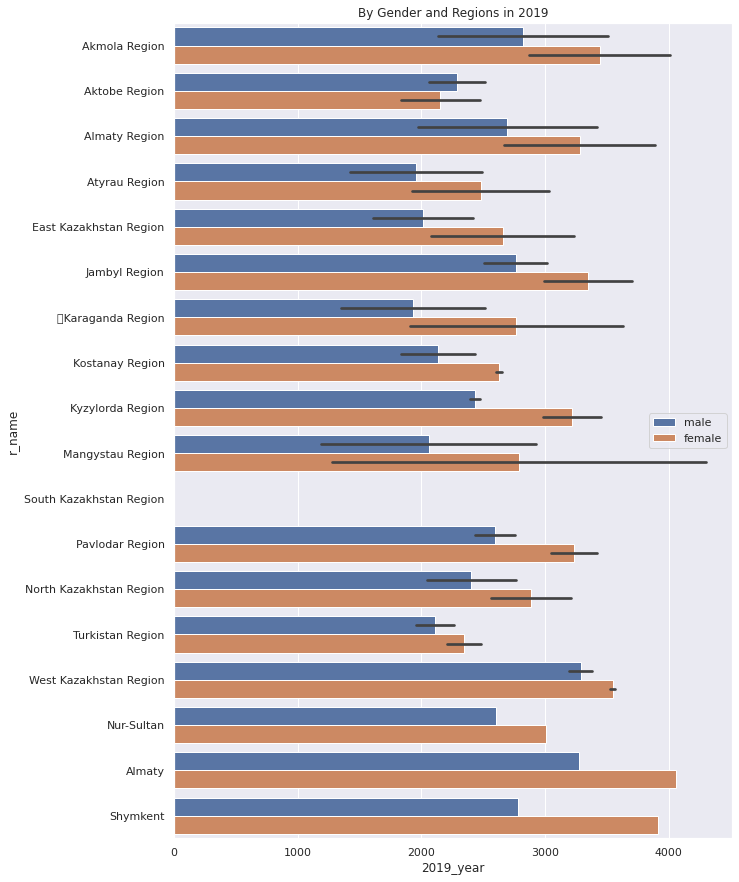

In [ ]:
plt.subplots( figsize=(10, 15))
sns.barplot(x="2019_year", y="r_name", hue="gender", data=dfKZ)
plt.legend()
plt.title('By Gender and Regions in 2019')
plt.show()

In all regions except for Aktobe region the proportion of women is higher

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 9 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 9 missing from current font.



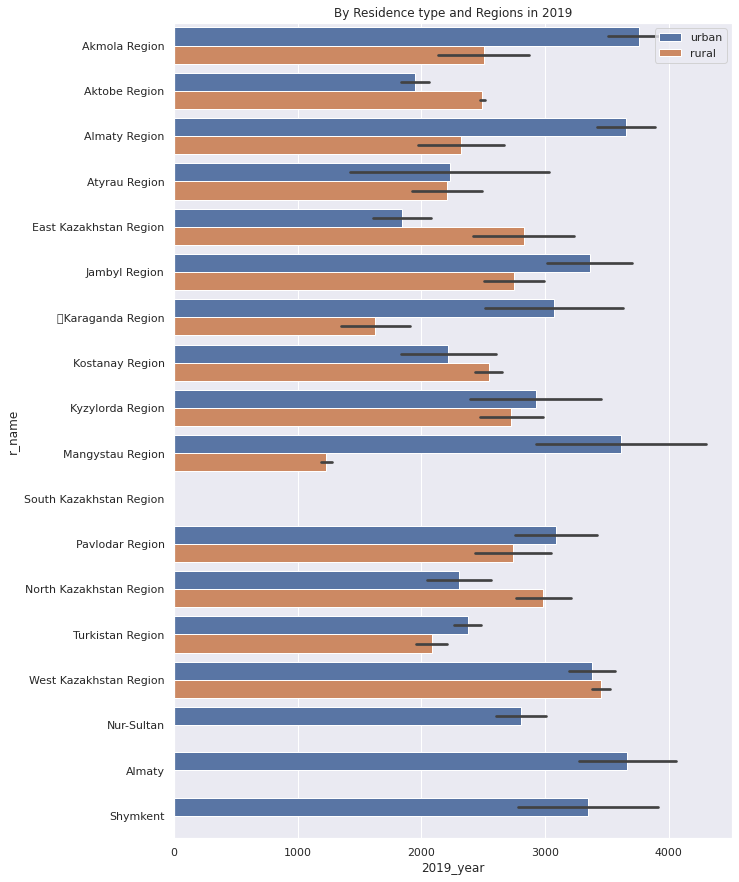

In [ ]:
plt.subplots( figsize=(10, 15))
sns.barplot(x="2019_year", y="r_name", hue="Residence_type", data=dfKZ)
plt.legend()
plt.title('By Residence type and Regions in 2019')
plt.show()

The number of people with stroke disease in urban areas is higher in the regions with large cities. It is recommended to pay attention to rural areas of North and West Kazakstan Regions. In general, this problem is mostly common for urban areas.

In [ ]:
fig = px.histogram(dfKZ, x="2019_year",color="Residence_type",
                   marginal="box",
                   hover_data=dfKZ.columns,
                  color_discrete_sequence=['#512b58','#f64c72'])
fig.show()

In [ ]:
fig = px.histogram(dfKZ, x="2007_year",color="Residence_type",
                   marginal="box",
                   hover_data=dfKZ.columns,
                  color_discrete_sequence=['#512b58','#f64c72'])
fig.show()

In [ ]:
years = dfKZ[[
'2007_year',
'2008_year',
'2009_year',
'2010_year',
'2011_year',
'2012_year',
'2013_year',
'2014_year',
'2015_year',
'2016_year',
'2017_year',
'2018_year',
'2019_year'
]]

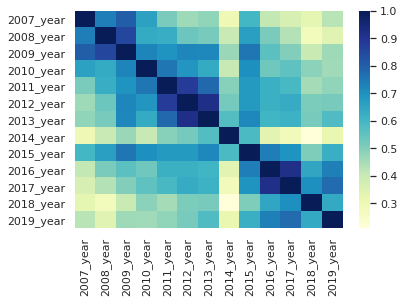

In [ ]:
sns.heatmap(years.corr(), cmap="YlGnBu")

Relplot for 2007_year


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 9 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 9 missing from current font.



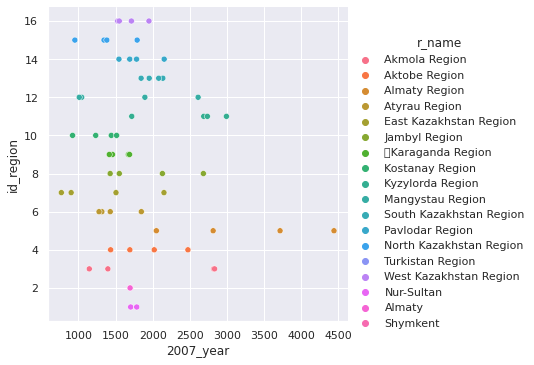

Relplot for 2008_year


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 9 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 9 missing from current font.



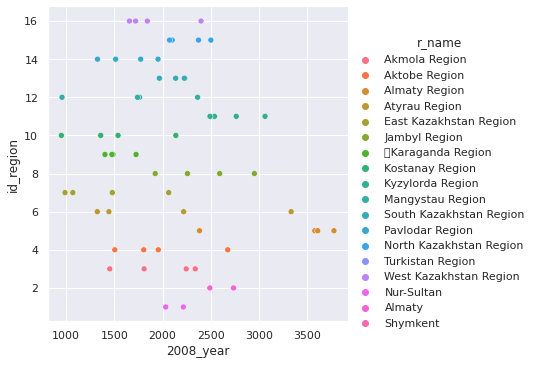

Relplot for 2009_year


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 9 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 9 missing from current font.



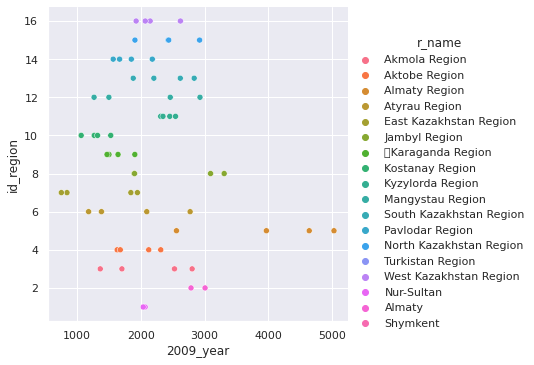

Relplot for 2010_year


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 9 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 9 missing from current font.



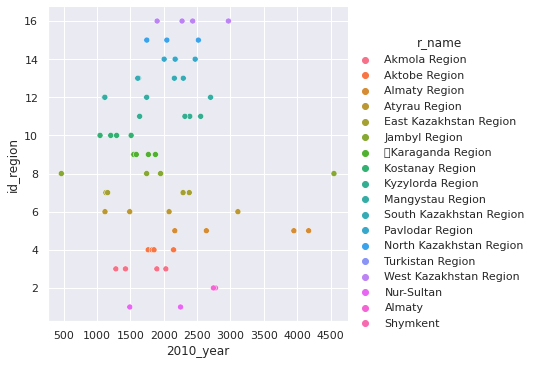

Relplot for 2011_year


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 9 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 9 missing from current font.



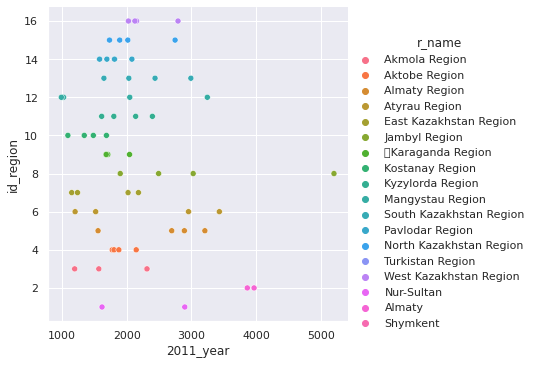

Relplot for 2012_year


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 9 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 9 missing from current font.



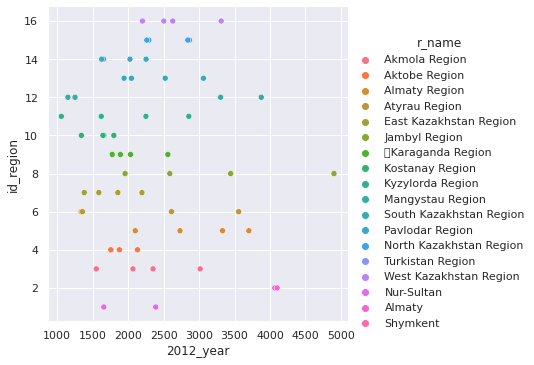

Relplot for 2013_year


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 9 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 9 missing from current font.



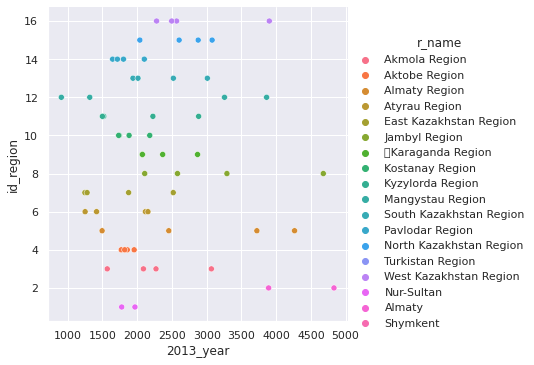

Relplot for 2014_year


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 9 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 9 missing from current font.



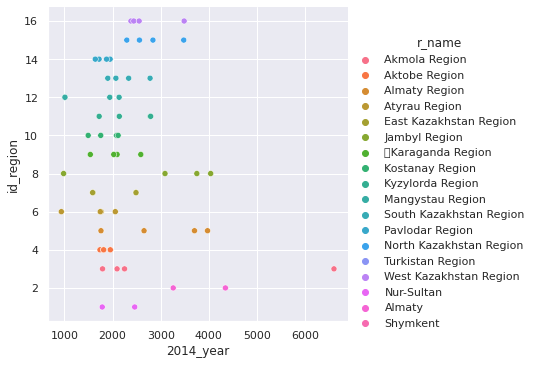

Relplot for 2015_year


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 9 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 9 missing from current font.



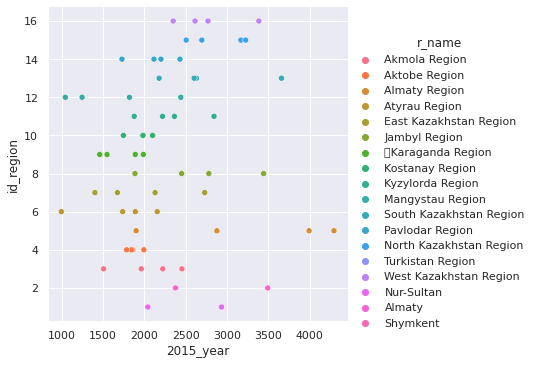

Relplot for 2016_year


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 9 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 9 missing from current font.



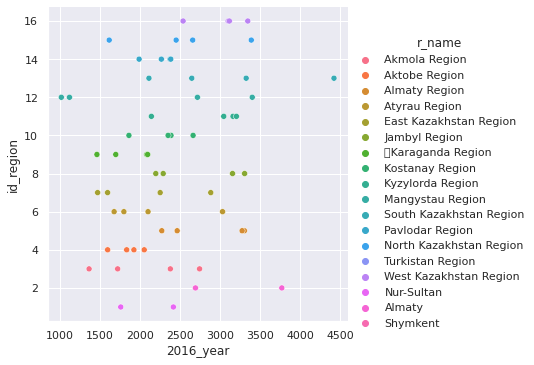

Relplot for 2017_year


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 9 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 9 missing from current font.



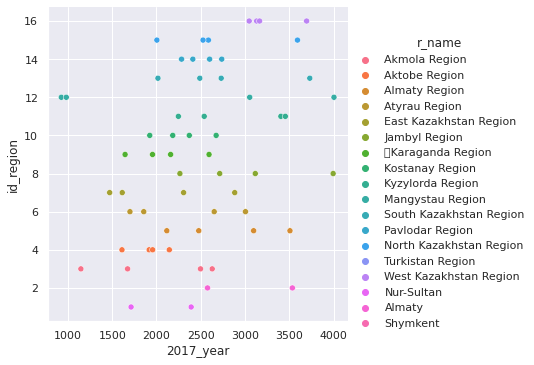

Relplot for 2018_year


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 9 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 9 missing from current font.



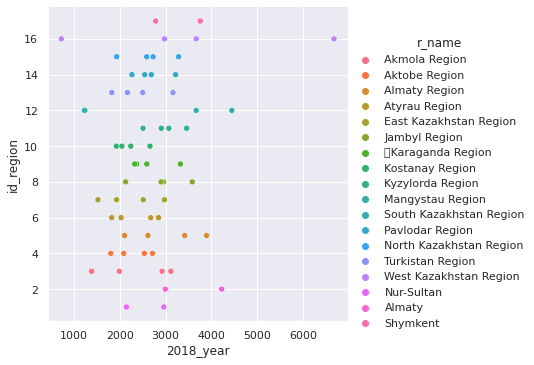

Relplot for 2019_year


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 9 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 9 missing from current font.



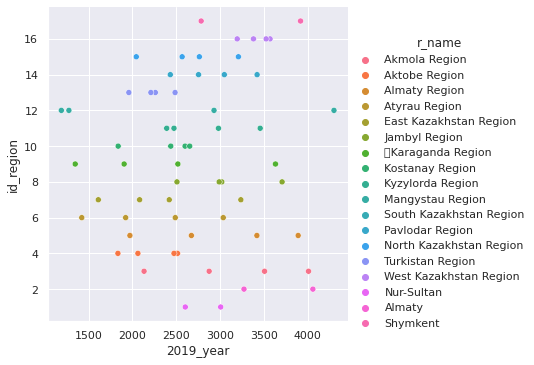

In [ ]:
for i in ['2007_year',
'2008_year',
'2009_year',
'2010_year',
'2011_year',
'2012_year',
'2013_year',
'2014_year',
'2015_year',
'2016_year',
'2017_year',
'2018_year',
'2019_year']:
    print('Relplot for {}'.format(i))
    _ = sns.relplot(data = dfKZ, x = i,y = "id_region", hue = "r_name")
    plt.show()



<a id="con"></a>
## 8. Conclusion

RQ 1: Does smoking status has impact on strokes?

According to our analysis, we found that the number of people who have ever smoked(formerly smoked+smokes) is more than those who have never smokes, so smoking might affect to stroke.

RQ 2: Does heart disease in a person, propel a heart stroke?

(!) Most of people who experienced stroke did not have heart disease.

RQ 3: Does age has impact on stokes?

Age category that struggles with stroke most frequently is between 70 and 80. The next one is between 50 and 70.

RQ 4: Does the type of job, whether stressful or not, contribute to heart stroke?

As we found , YES the type of the job may lead to stroke. We found that, approximately 60% of the people who are affected by stroke belongs to private work type. So, we could say that the people working in private jobs might experience high stress or pressure.

RQ 5: Does the mariiage status affect to having stroke?

According to this barplot we can see the the problem of stroke among single and married people. 

According to the comparison metric we found that the accuracy results are pretty the same. In logistic regression is approximately 94% while using RFC is also 94%. 



## 9. References and Bibliography

1. https://liter.kz/10722-do-40-tysyach-insultov-proishodit-v-kazahstane-kak-eto-proishodit/#:~:text=%D0%95%D0%B6%D0%B5%D0%B3%D0%BE%D0%B4%D0%BD%D0%BE%20%D0%B2%20%D0%9A%D0%B0%D0%B7%D0%B0%D1%85%D1%81%D1%82%D0%B0%D0%BD%D0%B5%20%D0%B1%D0%BE%D0%BB%D0%B5%D0%B5%2040,%D0%BE%D1%82%2061%20%D0%B4%D0%BE%2070%20%D0%BB%D0%B5%D1%82
2. https://neuroclinic.kz/sv/about/news/925792/
3. http://neurojournal.kz/assets/files/journals/2019(spec)/1.%20%D0%98%D0%9D%D0%A1%D0%A3%D0%9B%D0%AC%D0%A2%20%D0%92%20%D0%9A%D0%90%D0%97%D0%90%D0%A5%D0%A1%D0%A2%D0%90%D0%9D%D0%95.pdf
4. https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/